**Introduction**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/macrodata.csv', index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

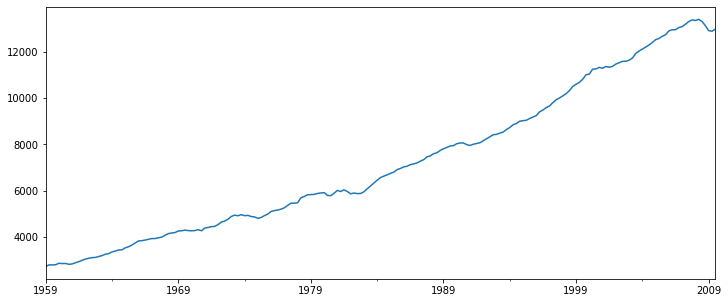

In [3]:
df['realgdp'].plot(figsize=(12, 5))

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [8]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

In [9]:
df['trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<AxesSubplot:>

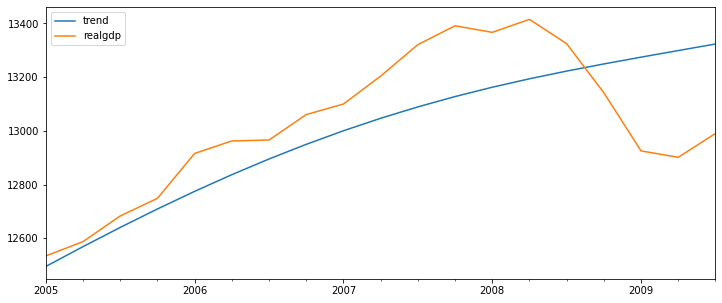

In [11]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12, 5))

**Error Trend Seasonality (ETS) model**

In [12]:
import pandas as pd
import numpy as np
%matplotlib inline

In [13]:
df = pd.read_csv('./datasets/airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

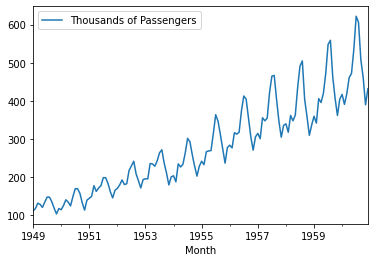

In [15]:
df.plot()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

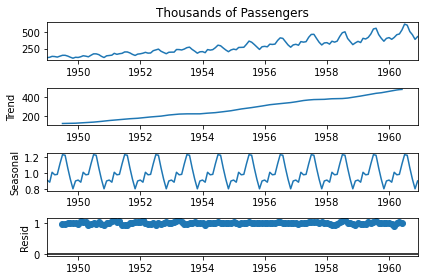

In [27]:
result.plot();

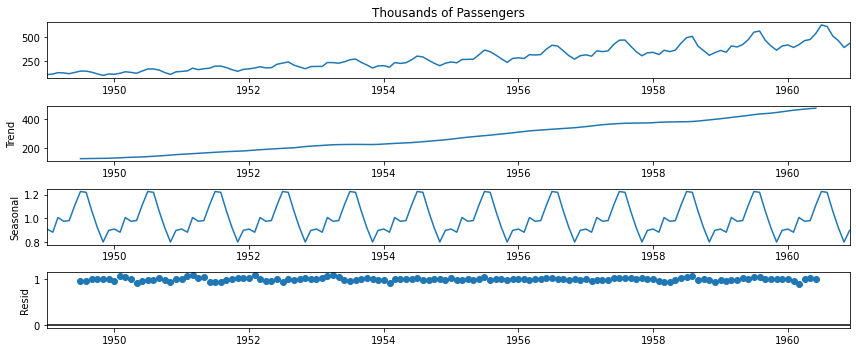

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

result.plot();

**Exponentially Weighted Moving Average (EWMA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('./datasets/airline_passengers.csv', index_col='Month', parse_dates=True)

In [8]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [10]:
df['6-Month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-Month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

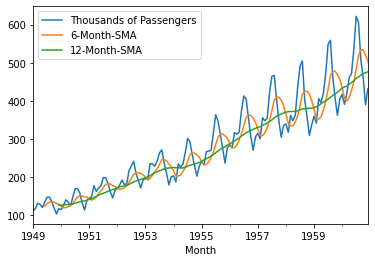

In [11]:
df.plot()

In [12]:
df['EWMA-12'] = df['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

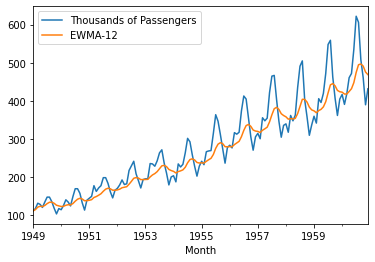

In [14]:
df[['Thousands of Passengers', 'EWMA-12']].plot()

**Holt-Winters Method**

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline

In [16]:
df = pd.read_csv('./datasets/airline_passengers.csv', index_col='Month', parse_dates=True)

In [17]:
df.dropna(inplace=True)

In [18]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [19]:
df.index.freq = 'MS'

In [20]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [22]:
span = 12
alpha = 2/(span+1)

In [23]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [24]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [25]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [27]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [30]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [31]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [33]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [34]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.23775
1949-02-01,118,112.923077,112.923077,120.23775
1949-03-01,132,115.857988,115.857988,134.23775
1949-04-01,129,117.879836,117.879836,131.23775
1949-05-01,121,118.359861,118.359861,123.23775


<AxesSubplot:xlabel='Month'>

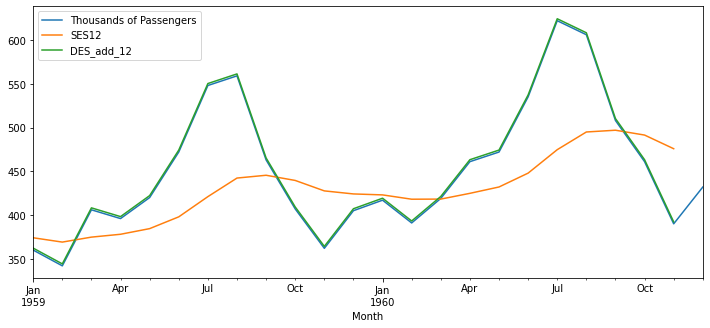

In [39]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12, 5))

In [40]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


<AxesSubplot:xlabel='Month'>

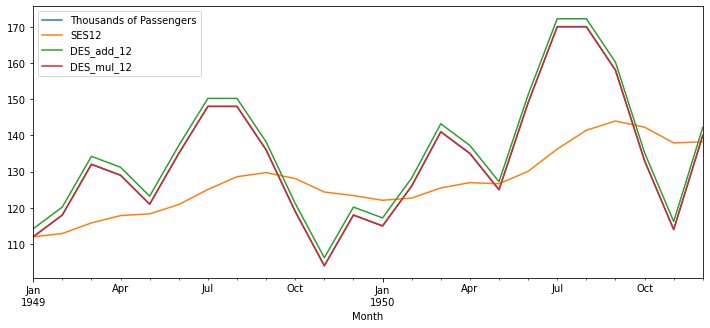

In [42]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12, 5))

In [46]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [47]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.23775,112.049247,111.591612
1949-02-01,118,112.923077,112.923077,120.23775,118.051885,118.839947
1949-03-01,132,115.857988,115.857988,134.23775,132.058041,133.326477
1949-04-01,129,117.879836,117.879836,131.23775,129.056722,127.903967
1949-05-01,121,118.359861,118.359861,123.23775,121.053204,120.975221


<AxesSubplot:xlabel='Month'>

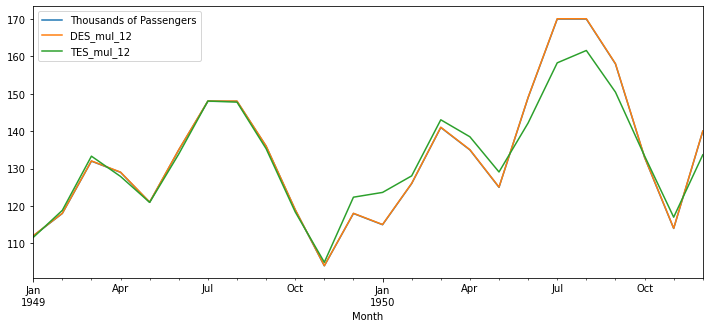

In [49]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12, 5))